In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



 Ringkasan Statistik
       Durability  DesignScore  CostEfficiency  Usability  EcoFriendly  \
count   15.000000    15.000000       15.000000  15.000000    15.000000   
mean     5.200000     5.133333        4.466667   5.866667     5.133333   
std      2.366432     2.587516        2.386470   2.614975     2.587516   
min      1.000000     1.000000        1.000000   1.000000     1.000000   
25%      3.500000     3.000000        2.500000   4.000000     3.000000   
50%      5.000000     5.000000        5.000000   6.000000     5.000000   
75%      7.000000     7.000000        6.000000   8.000000     7.000000   
max      9.000000     9.000000        8.000000   9.000000     9.000000   

           Label  
count  15.000000  
mean    0.933333  
std     0.883715  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     2.000000  
max     2.000000  


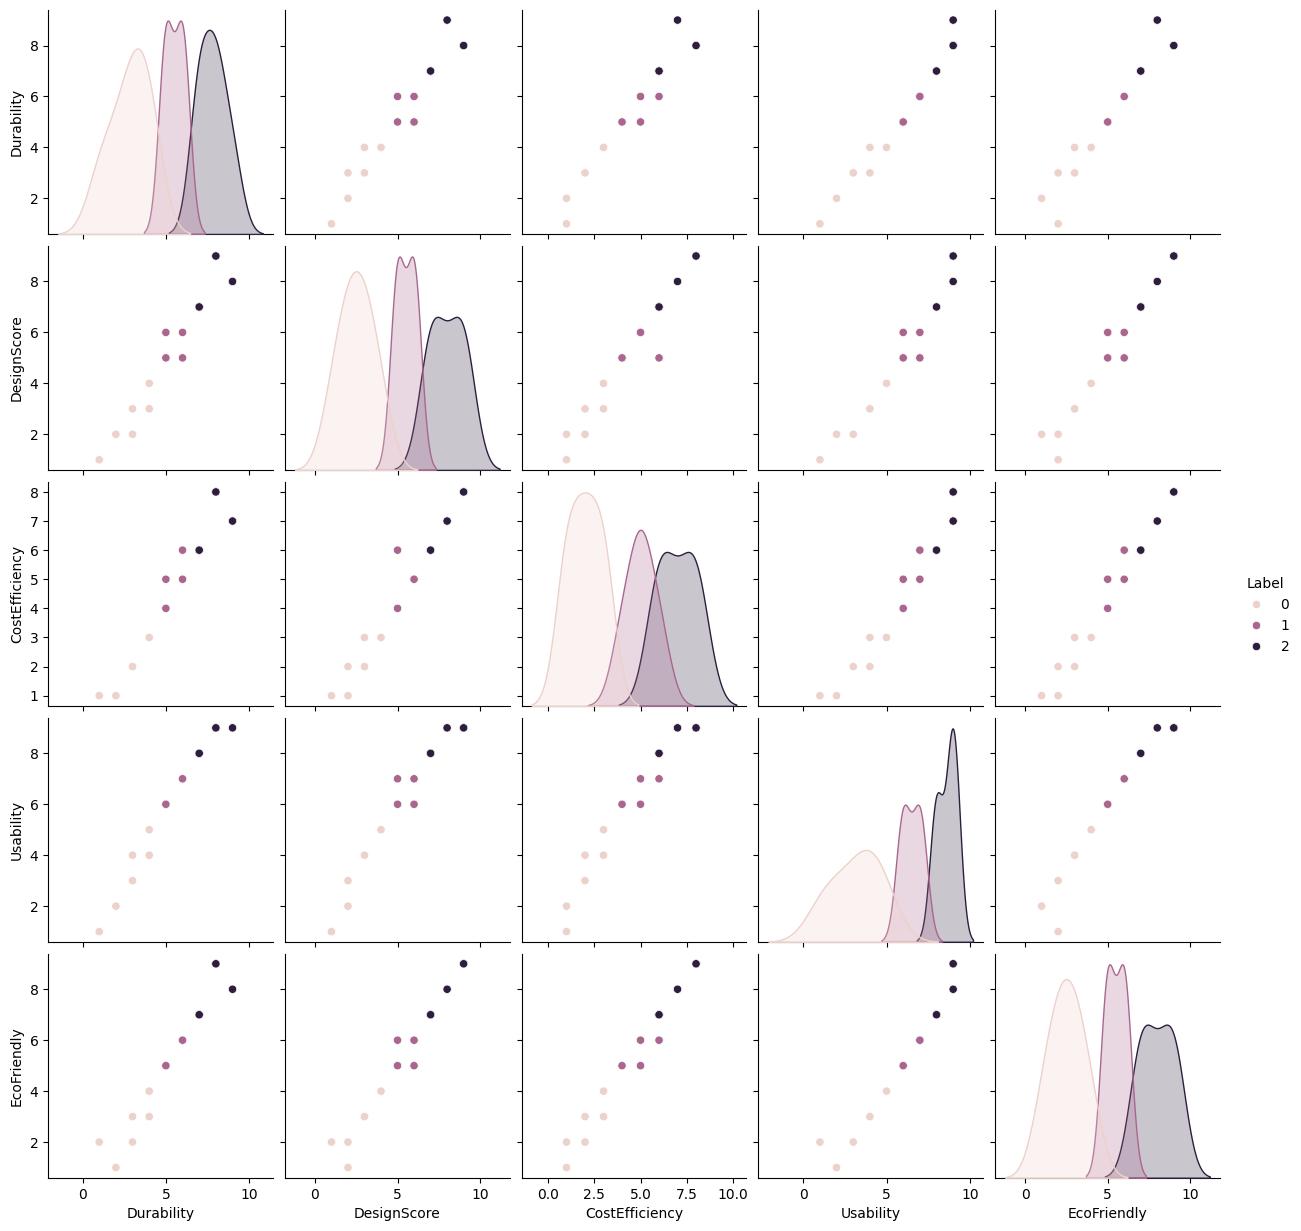

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

data = {
    'Durability' :      [9, 7, 8, 5, 6, 3, 4, 2, 1, 5, 6, 4, 3, 7, 8],
    'DesignScore' :     [8, 7, 9, 5, 6, 3, 4, 2, 1, 6, 5, 3, 2, 7, 9],
    'CostEfficiency' :  [7, 6, 8, 4, 5, 2, 3, 1, 1, 5, 6, 3, 2, 6, 8],
    'Usability' :       [9, 8, 9, 6, 7, 4, 5, 2, 1, 6, 7, 4, 3, 8, 9],
    'EcoFriendly' :     [8, 7, 9, 5, 6, 3, 4, 1, 2, 5, 6, 3, 2, 7, 9],
    'Label' :           [2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2],
}
df = pd.DataFrame(data)
print("\n Ringkasan Statistik")
print(df.describe())
sns.pairplot(df, hue='Label')
plt.show()

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovo')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2 0 0]
 [0 1 0]
 [0 1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



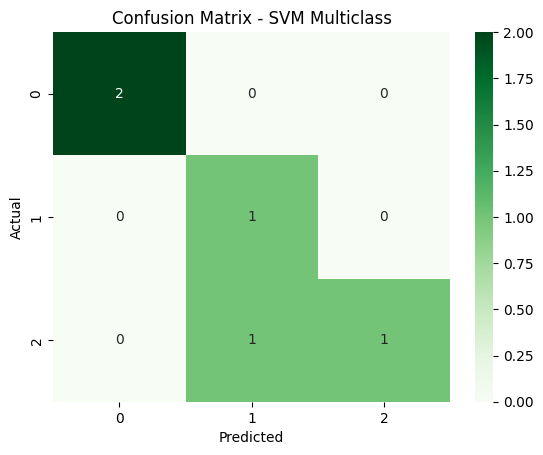

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Multiclass")
plt.show()

In [ ]:
# a. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# b. Buat Dataset
data = {
    'Durability': [9,7,8,5,6,3,4,2,1,5,6,4,3,7,8],
    'DesignScore': [8,7,9,5,6,3,4,2,1,6,5,3,2,7,9],
    'CostEfficiency': [7,6,8,4,5,2,3,1,1,5,6,3,2,6,8],
    'Usability': [9,8,9,6,7,4,5,2,1,6,7,4,3,8,9],
    'EcoFriendly': [8,7,9,5,6,3,4,1,2,5,6,3,2,7,9],
    'Label': [2,2,2,1,1,0,0,0,0,1,1,0,0,2,2]
}
df = pd.DataFrame(data)

# # c. EDA
# print("Statistik Deskriptif:")
# print(df.describe())
# sns.pairplot(df, hue='Label')
# plt.show()

# d. Fitur dan Split
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# e. Model SVM Kernel Linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# f. Model SVM Kernel Poly
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# g. Evaluasi dan Bandingkan
print("=== Linear Kernel ===")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("\n=== Polynomial Kernel ===")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))


=== Linear Kernel ===
[[2 0 0]
 [0 1 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


=== Polynomial Kernel ===
[[2 0 0]
 [0 1 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [1]:
# 1. Dataset
data = {
    'Income': [50,45,30,25,70,60,20,35,55,40],
    'CreditScore': [700,650,600,580,720,710,560,610,680,620],
    'LoanAmount': [20,25,40,45,15,18,50,35,30,32],
    'Label': [1,1,0,0,1,1,0,0,1,0]
}
df = pd.DataFrame(data)

# 2. Preprocessing
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 3. Bangun Model
models = {
    "Linear": SVC(kernel='linear'),
    "Poly": SVC(kernel='poly', degree=3),
    "RBF": SVC(kernel='rbf')
}

# 4. Evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} Kernel ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # 5. Visualisasi Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name} Kernel')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


NameError: name 'pd' is not defined